### pandas 基础

In [13]:
from pandas import Series,DataFrame
from numpy import *
import pandas as pd

##### Series

In [14]:
obj=Series([1,2,3,4],index=list('abcd'))
obj

a    1
b    2
c    3
d    4
dtype: int64

In [15]:
obj2=obj.reindex(list('cdeab'),method='ffill')
obj2

c    3
d    4
e    4
a    1
b    2
dtype: int64

##### DataFrame.reindex
    reindex(self, index=None, columns=None, **kwargs)
        Conform DataFrame to new index with optional filling logic, placing
        NA/NaN in locations having no value in the previous index. A new object
        is produced unless the new index is equivalent to the current one and
        copy=False

In [16]:
frame=DataFrame(arange(9).reshape((3,3)),index=['a','b','c'],columns=['d','e','f'])

In [17]:
print(frame,'\n',frame.reindex(columns=['a','b','c'],copy=False))

   d  e  f
a  0  1  2
b  3  4  5
c  6  7  8 
     a   b   c
a NaN NaN NaN
b NaN NaN NaN
c NaN NaN NaN


##### 如果重新构造就不会有哪些问题

In [18]:
f=DataFrame(array(frame[['d','e','f']]),index=frame.index,columns=['a','b','c'])

##### drop，axis=0,1

In [19]:
#删除每列的a
f.drop(['a'],axis=0)

,a,b,c
b,3,4,5
c,6,7,8


In [20]:
#删除行的a
f.drop('a',axis=1)

,b,c
a,1,2
b,4,5
c,7,8


##### apply

In [21]:
#对每列应用这个函数
app=lambda x: x-x.min()
f.apply(app,axis=0)

,a,b,c
a,0,0,0
b,3,3,3
c,6,6,6


In [64]:
#格式化
form=lambda x:'%.2f'%x
f.applymap(form)

,a,b,c
a,0.00,1.00,2.00
b,3.00,4.00,5.00
c,6.00,7.00,8.00



##### sort_index,按照索引对索引排序  axis，对 列 / 行操作，ascendign升序

In [69]:
f.sort_index(axis=0,ascending=False)

,a,b,c
c,6,7,8
b,3,4,5
a,0,1,2



##### sort_values,按照值对索引排序  axis，对 列 / 行操作，ascendign升序

In [73]:
f.sort_values(by='a',ascending=False)

,a,b,c
c,6,7,8
b,3,4,5
a,0,1,2


In [80]:
#对每列求和
f.sum(axis=0)

a     9
b    12
c    15
dtype: int64

In [77]:
f

,a,b,c
a,0,1,2
b,3,4,5
c,6,7,8


In [81]:
#累加
f.cumsum(axis=1)

,a,b,c
a,0,1,3
b,3,7,12
c,6,13,21


#### describe , 对DataFrame 描述

In [83]:
f.describe()

,a,b,c
count,3.0,3.0,3.0
mean,3.0,4.0,5.0
std,3.0,3.0,3.0
min,0.0,1.0,2.0
25%,1.5,2.5,3.5
50%,3.0,4.0,5.0
75%,4.5,5.5,6.5
max,6.0,7.0,8.0


In [88]:
#一阶差分
f.diff(1)

,a,b,c
a,NaN,NaN,NaN
b,3.0,3.0,3.0
c,3.0,3.0,3.0


##### corr 相关系数

In [93]:
f.corr()#coeff

,a,b,c
a,1.0,1.0,1.0
b,1.0,1.0,1.0
c,1.0,1.0,1.0


In [99]:
f.cov()#

,a,b,c
a,9.0,9.0,9.0
b,9.0,9.0,9.0
c,9.0,9.0,9.0


In [23]:
ob=Series(list('adxcsalksdkjxsa'))
ob.head()

0    a
1    d
2    x
3    c
4    s
dtype: object

In [24]:
un=ob.unique()
un

array(['a', 'd', 'x', 'c', 's', 'l', 'k', 'j'], dtype=object)

In [25]:
ob.value_counts(sort=False)

a    3
l    1
c    1
d    2
k    2
x    2
s    3
j    1
dtype: int64

In [26]:
ob[ob.isin(['a'])]

0     a
5     a
14    a
dtype: object

##### nan    ———————— axis: 0 or 'index', 1 or 'columns'

In [27]:
da=DataFrame([[1,2,3],[4,nan,nan],
             [nan,nan,nan],[nan,6,3]])
da

,0,1,2
0,1.0,2.0,3.0
1,4.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.0,3.0


In [28]:
da.dropna(how='all')

,0,1,2
0,1.0,2.0,3.0
1,4.0,NaN,NaN
3,NaN,6.0,3.0


In [29]:
da.dropna(how='all',axis=1)

,0,1,2
0,1.0,2.0,3.0
1,4.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.0,3.0


In [116]:
da.dropna()

,0,1,2
0,1.0,2.0,3.0


In [119]:
#按照列方向
da.fillna({0:2,1:0.5})

,0,1,2
0,1.0,2.0,3.0
1,4.0,0.5,NaN
2,2.0,0.5,NaN
3,2.0,6.0,3.0


In [126]:
da.fillna(method='ffill',limit=1,inplace=True)
da

,0,1,2
0,1.0,2.0,3.0
1,4.0,2.0,3.0
2,4.0,2.0,3.0
3,4.0,6.0,3.0


##### stack ，unstack

In [135]:
da2=da.unstack()
da2.index

MultiIndex(levels=[[0, 1, 2], [0, 1, 2, 3]],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]])

In [136]:
da2.head()

0  0    1.0
   1    4.0
   2    4.0
   3    4.0
1  0    2.0
dtype: float64

In [137]:
da

,0,1,2
0,1.0,2.0,3.0
1,4.0,2.0,3.0
2,4.0,2.0,3.0
3,4.0,6.0,3.0


In [142]:
#用那一列当做新的index
da3=da.set_index([1],drop=True)
da3

,0,2
1,,
2.0,1.0,3.0
2.0,4.0,3.0
2.0,4.0,3.0
6.0,4.0,3.0


In [145]:
#dro ，是否删除index
da3.reset_index(drop=True)

,0,2
0,1.0,3.0
1,4.0,3.0
2,4.0,3.0
3,4.0,3.0


##### 链接  
     merge,键 
     concat 轴，axis=0

In [30]:
d1=DataFrame({'key':['a','b','d'],'data1':range(3)})
d1

,data1,key
0,0,a
1,1,b
2,2,d


In [31]:
d2=DataFrame({'key':['c','b','d'],'data2':range(1,4)})
d2

,data2,key
0,1,c
1,2,b
2,3,d


In [32]:
#应用于连个dataframe 需要对齐的位置，索引不同的情况
merge(d1,d2,left_on='data1',right_on='data2',how='inner')

,data1,key_x,data2,key_y
0,1,b,1,c
1,2,d,2,b


In [33]:
#应用于连个dataframe 需要对齐的位置，索引不同的情况
merge(d1,d2,left_on='data1',right_on='data2',how='outer')

,data1,key_x,data2,key_y
0,0.0,a,NaN,NaN
1,1.0,b,1.0,c
2,2.0,d,2.0,b
3,NaN,NaN,3.0,d


In [174]:
# 会删除，在key上不同的东西
merge(d1,d2,on='key',how='inner')

,data1,key,data2
0,1,b,2
1,2,d,3


In [191]:
merge(d1,d2,on='key',how='outer')

,data1,key,data2
0,0.0,a,NaN
1,1.0,b,2.0
2,2.0,d,3.0
3,NaN,c,1.0


In [203]:
d2

,data2,key
a,1,c
1,2,b
2,3,d


In [207]:
d2.rename(index={0:'a'})
d2

,data2,key
a,1,c
1,2,b
2,3,d


In [64]:
stamp.strftime('%Y,%m,%d')

'2011,01,12'

In [65]:
from dateutil.parser import parse
parse('2011-11-1')

datetime.datetime(2011, 11, 1, 0, 0)

In [66]:
parse?

In [218]:
dates=date_range('1/1/2000',periods=100,freq='W-WED')
long=DataFrame(random.rand(100,4),index=dates,columns=list('abcd'))

In [219]:
long.head()

,a,b,c,d
2000-01-05,0.625324,0.081019,0.056472,0.090580
2000-01-12,0.442830,0.268490,0.809225,0.029676
2000-01-19,0.976271,0.217780,0.642069,0.404248
2000-01-26,0.303100,0.056061,0.497815,0.671508
2000-02-02,0.115643,0.228232,0.218574,0.094792


In [69]:
long.ix['5-2001':'6-2001']

,a,b,c,d
2001-05-02,0.995576,0.530611,0.662965,0.297078
2001-05-09,0.498233,0.684180,0.288669,0.537507
2001-05-16,0.890172,0.228506,0.892775,0.613714
2001-05-23,0.289677,0.856919,0.364465,0.838670
2001-05-30,0.394762,0.007050,0.337491,0.835321
2001-06-06,0.858180,0.962105,0.457871,0.236417
2001-06-13,0.840386,0.617091,0.406302,0.894596
2001-06-20,0.637508,0.543856,0.738506,0.620478
2001-06-27,0.905285,0.476522,0.048184,0.166503


In [70]:
index=Series(date_range('4/1/2000','4/1/2001',freq='M'))

In [71]:
index

0    2000-04-30
1    2000-05-31
2    2000-06-30
3    2000-07-31
4    2000-08-31
5    2000-09-30
6    2000-10-31
7    2000-11-30
8    2000-12-31
9    2001-01-31
10   2001-02-28
11   2001-03-31
dtype: datetime64[ns]

In [73]:
import pandas as pd
p=pd.Period('2007-8','M')
p

Period('2007-08', 'M')

In [35]:
import numpy as np
rng=pd.period_range('2006','2012',freq='A-DEC')
ts=pd.Series(np.random.rand(len(rng)),index=rng)
ts

2006    0.994509
2007    0.390422
2008    0.702878
2009    0.402120
2010    0.752779
2011    0.048156
2012    0.331685
Freq: A-DEC, dtype: float64

In [36]:
ts.asfreq('M',how='start')

2006-01    0.994509
2007-01    0.390422
2008-01    0.702878
2009-01    0.402120
2010-01    0.752779
2011-01    0.048156
2012-01    0.331685
Freq: M, dtype: float64

In [39]:
#resample
rng=pd.date_range('1/1/2006',periods=10,freq='D')
ts=pd.Series(np.random.randn(len(rng)),index=rng)
ts

2006-01-01   -0.541159
2006-01-02    1.824539
2006-01-03    0.838465
2006-01-04   -0.569178
2006-01-05   -0.444249
2006-01-06   -0.367286
2006-01-07   -1.172551
2006-01-08   -0.960563
2006-01-09   -0.138703
2006-01-10   -1.606852
Freq: D, dtype: float64

In [40]:
ts.resample('M',kind='period').mean()

2006-01   -0.313754
Freq: M, dtype: float64

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


-0.3137537424344476

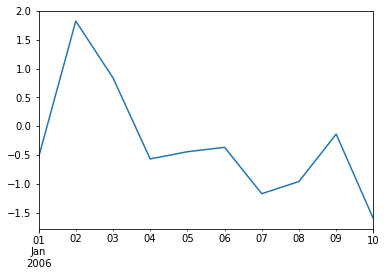

In [45]:
%pylab
%matplotlib inline
ts.plot()
ts.apply(np.cumsum)
ts.mean()